<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 2

## Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

#### Coding hint:

You are going to need to generate 40 realizations of the random process, so do this in a `for`-loop, and save the results in an array that you initialize before the for-loop:
```python
r = np.zeros(40)
for ind,n in enumerate(noisevalues):
  # make your random variable
  ...
  # calculate r
  r[ind]=...
```
<hr>

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

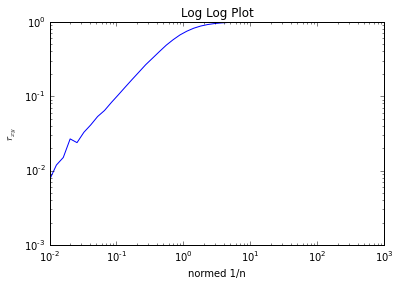

In [85]:
N = 200000
a = 1
n = np.logspace(-2, 2, 40)
x = np.random.randn(N)
r = np.zeros(40)


for ind,nn in enumerate(n):
    ni = np.random.randn(N)
    y = a*x+nn*ni
    X = x - np.mean(x)
    Y = y - np.mean(y)
    r[ind] = (np.sum(X*Y) / (np.std(x) * np.std(y))) / (N-1)
    
fig,ax=plt.subplots(1,1)
ax.loglog(((a*np.std(x))/n),r)
ax.set_xlabel('normed 1/n');ax.set_ylabel('$r_{xy}$');ax.set_title('Log Log Plot')

# YOUR CODE HERE

YOUR ANSWER HERE

**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$.  

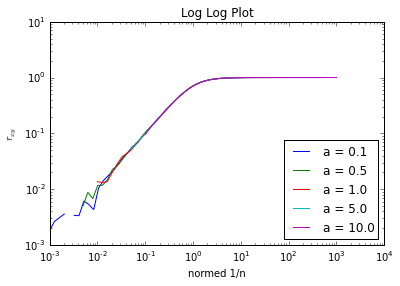

In [86]:
fig,ax=plt.subplots(1,1)

for aa in [0.1,0.5,1.,5.,10.]:
    
    for ind,nn in enumerate(n):
        ni = np.random.randn(N)
        y = aa*x+nn*ni
        X = x - np.mean(x)
        Y = y - np.mean(y)
        r[ind] = (np.sum(X*Y) / (np.std(x) * np.std(y))) / (N-1)

    ax.loglog(((aa*np.std(x))/n),r, label = "a = {}".format(aa))
ax.legend(loc=4)
ax.set_xlabel('normed 1/n');ax.set_ylabel('$r_{xy}$');ax.set_title('Log Log Plot')

    

Low values of $a$ creates more variation in the $r_{xy}$ values. This is because when the amplitudes are smaller the noise has a greater effect on the resulting values of $y$.

## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams

<hr>

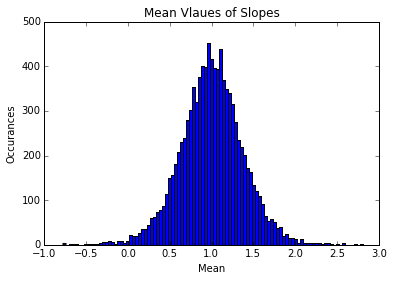

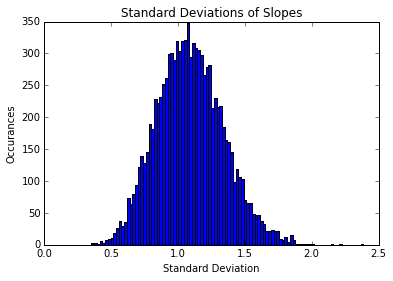

In [87]:
N = 10
NN = 10000
#n = 1.0
a = 1.0

B = np.zeros(NN)
S = np.zeros(NN)
for i in range(NN):
    x = np.random.randn(N)
    ni = np.random.randn(N)
    y = x*a + ni
    X = x - np.mean(x)
    Y = y - np.mean(y)
    B[i] = (np.sum(Y*x))/(np.sum(X*x))
    S[i] = (np.sum(ni**2)/(N-2))**0.5

plt.hist(B, 100)
plt.xlabel('Mean');plt.ylabel('Occurances');plt.title('Mean Vlaues of Slopes')
#plt.axis([-1,3,0,500])
plt.show()

plt.hist(S,100)
plt.xlabel('Standard Deviation');plt.ylabel('Occurances');plt.title('Standard Deviations of Slopes')
#plt.axis([-1,3,0,500])
plt.show()

Both histograms have a mean value around 1.

**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)

<hr>

'\nplt.plot(B,BB,"b--")\npdf=stats.norm.pdf(B)\nplt.plot(B,pdf,"k--")\nplt.show()'

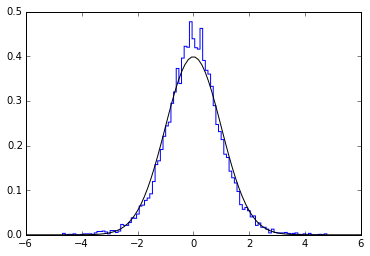

In [88]:
B = np.sort(B)
x = np.linspace(-6,6,100)
BB = stats.t.pdf(x, NN-2)

fig,ax=plt.subplots(1,1)

### ADD LABELS ###
ax.hist(((B-np.mean(B))/np.std(B)), 100,histtype='step',normed=True)
ax.plot(x,BB,'k-')
'''
plt.plot(B,BB,"b--")
pdf=stats.norm.pdf(B)
plt.plot(B,pdf,"k--")
plt.show()'''
# YOUR CODE HERE

**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.

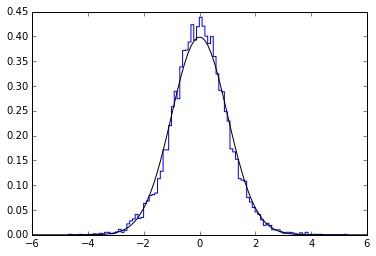

In [89]:
N = 15
NN = 10000
n = 5.0
a = 1.0

B = np.zeros(NN)
S = np.zeros(NN)
for i in range(NN):
    x = np.random.randn(N)
    ni = np.random.randn(N)
    y = x*a + n*ni
    X = x - np.mean(x)
    Y = y - np.mean(y)
    B[i] = (np.sum(Y*x))/(np.sum(X*x))
    S[i] = (np.sum(ni**2)/(N-2))**0.5
    
B = np.sort(B)
x = np.linspace(-6,6,100)
BB = stats.t.pdf(x, NN-2)

fig,ax=plt.subplots(1,1)

### ADD LABELS ###
ax.hist(((B-np.mean(B))/np.std(B)),100,histtype='step',normed=True)
ax.plot(x,BB,'k-')


## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [90]:
# Load the data:

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
dcc=dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

**1** Make a scatterplot of James Bay versus Deep Cove.

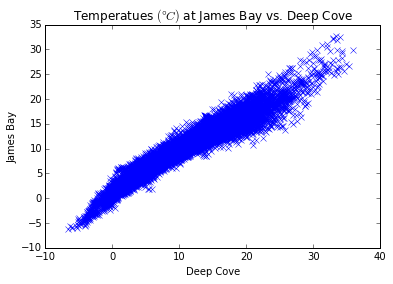

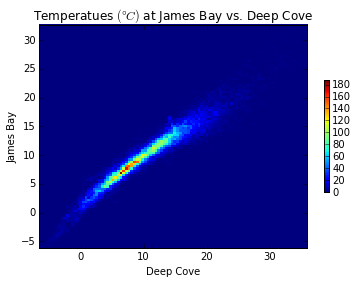

In [91]:
fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,"bx")
ax.set_title("Temperatues $(\degree C)$ at James Bay vs. Deep Cove");ax.set_xlabel('Deep Cove');ax.set_ylabel('James Bay')



fig,ax=plt.subplots(1,1)
(n,xx,yy,im) = ax.hist2d(dc,jb,bins=100)
plt.colorbar(im,shrink=0.5)
ax.set_title("Temperatues $(\degree C)$ at James Bay vs. Deep Cove");ax.set_xlabel('Deep Cove');ax.set_ylabel('James Bay')


**2** Compute the linear Correlation Co-efficient (without a canned routine)

In [92]:
DC = dc - np.mean(dc)
JB = jb - np.mean(jb)

r_dj = ((np.sum(DC*JB))/(np.std(dc)*np.std(jb)))/(len(dc)-1)
print "The Correlation Coefficient is :",r_dj


The Correlation Coefficient is : 0.965414194534


**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.

<hr>

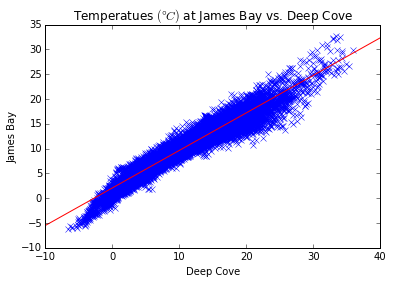

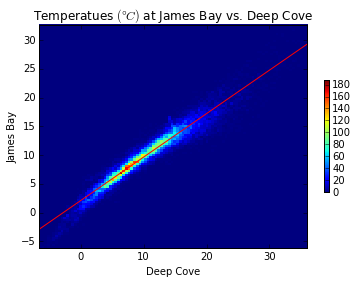

In [93]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dc,jb)
x = np.linspace(-10,40,100)
y = slope * x + intercept

fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,"bx")
ax.set_title("Temperatues $(\degree C)$ at James Bay vs. Deep Cove");ax.set_xlabel('Deep Cove');ax.set_ylabel('James Bay')
ax.plot(x,y,'r-')

fig,ax=plt.subplots(1,1)
(n,xx,yy,im) = ax.hist2d(dc,jb,bins=100)
plt.colorbar(im,shrink=0.5)
ax.set_title("Temperatues $(\degree C)$ at James Bay vs. Deep Cove");ax.set_xlabel('Deep Cove');ax.set_ylabel('James Bay')
ax.plot(x,y,'r-')

The resulting fit appears to be a good fit to the scatter plot. This is better seen when looking at the 2D histogram, where the fin can be seen to match up very well with the regions with higher counts.

**4** Add the confidence intervals to your fit, and comment.

Slope b is between 0.753791 and 0.759110 with 95% probability


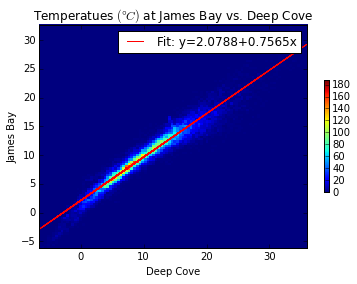

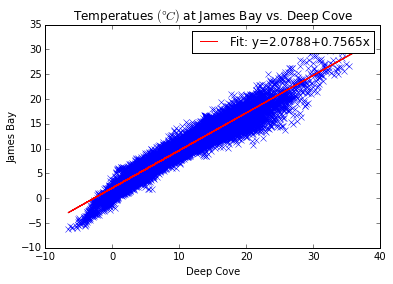

In [98]:
def stuff(x,y,X,Y):
    N = len(x)
    b = np.sum(x*y)-N*np.mean(x)*np.mean(y)
    b = b/(np.sum(x**2)-N*np.mean(x)**2)
    a = np.mean(y)-b*np.mean(x)
    yhat=b*x+a

    fig,ax=plt.subplots(1,1)
    (n,xx,yy,im) = ax.hist2d(x,y,bins=100)
    plt.colorbar(im,shrink=0.5)
    ax.plot(x,yhat,'r-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
    plt.legend()
    ax.set_title("Temperatues $(\degree C)$ at {} vs. {}".format(Y,X));ax.set_xlabel(X);ax.set_ylabel(Y)

    # get the error bounds...
    syx=np.sqrt(np.sum((y-yhat)**2)/(N-2))

    bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
    bb=np.array([bdn,bup])
    bb=bb/np.sqrt(np.sum((x-np.mean(x))**2))
    print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
    xx=np.sort(x)
    yhathigh=(b+bb[1])*(xx-np.mean(x))+np.mean(y)
    yhatlow=(b+bb[0])*(xx-np.mean(x))+np.mean(y)
    ax.fill_between(xx,yhathigh,yhatlow,facecolor='red',alpha=0.4)
    
    
    fig,ax=plt.subplots(1,1)
    ax.plot(x,y,'bx')
    ax.plot(x,yhat,'r-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
    plt.legend()
    ax.set_title("Temperatues $(\degree C)$ at {} vs. {}".format(Y,X));ax.set_xlabel(X);ax.set_ylabel(Y)
    ax.fill_between(xx,yhathigh,yhatlow,facecolor='red',alpha=0.4)
    
stuff(dc,jb,'Deep Cove','James Bay')


Due to the large sample size of the collected data, the confidence intervals are very small. If there was less data collected the size of the intervals would be larger and easier to see when plotted.

**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.

Slope b is between 1.227663 and 1.236326 with 95% probability


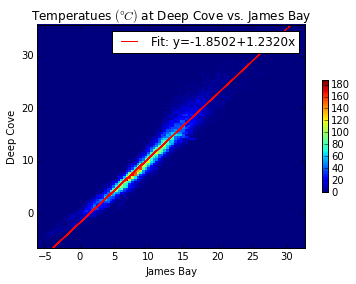

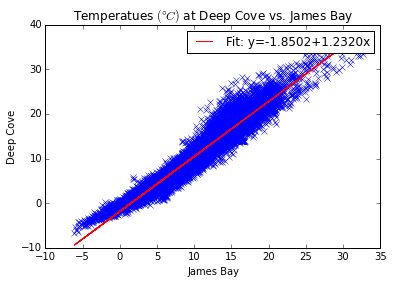

In [95]:
stuff(jb,dc,'James Bay','Deep Cove')


The best fit lines appear to pass through the same path as the previous case, however now the slope is different as the dependent variable has been changed.  

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  